# Research Area Subject Area Prediction

# Project Task:
Research Area Subject Area Prediction (Large Scale classification) using three models: 
1. Shallow Multi-Layer Perceptron (MLP)
2. Logistic Regression
3. 1D Convolutional Neural Network (CNN)

Research Papers dataset link::
https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts/data

# Loading tools and dataset

In [2]:
!pip install tensorflow --ignore-installed

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached pygments-2.19.2-py3-none-any.whl.metadata (2.5 kB)
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 2.4/331.9 MB 22.3 MB/s eta 0:00:15
   - --------------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
httpie 3.2.3 requires requests[socks]<=2.31.0,>=2.22.0, but you have requests 2.32.5 which is incompatible.


In [6]:
!pip install scikit-learn --ignore-installed --user

  Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.3.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.16.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached numpy-2.3.4-cp312-cp312-win_amd64.whl (12.8 MB)
Using cached scipy-1.16.3-cp312-cp312-win_amd64.whl (38.6 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------------- -------------- 5.2/8.1 MB 35.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 33.6 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 42.7 MB/s  0:00:00
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- ---------------------

In [3]:
!pip install pandas

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.0 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 35.3 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 29.9 MB/s  0:00:00

   ---------------------------------------- 0/2 [tzdata]
   ---------------------------------------- 0/2 [tzdata]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   -------------------- ------------------- 1/2 [pandas]
   ---------

In [4]:
!pip install numpy

In [1]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split

from ast import literal_eval
# is used for safely evaluating strings containing Python literals or container displays
# (e.g., lists, dictionaries) to their corresponding Python objects.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
arxiv_data = pd.read_csv("arxiv_data_210930-054931.csv")

In [3]:
arxiv_data.head()

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...


# Data Cleaning and Preprocessing

In [4]:
arxiv_data.shape

(56181, 3)

In [5]:
arxiv_data.isnull().sum()

terms        0
titles       0
abstracts    0
dtype: int64

In [6]:
arxiv_data.duplicated().sum()

np.int64(15054)

## Exploratory Data Analysis (Visualization)

In [7]:
!pip install seaborn

Access is denied.


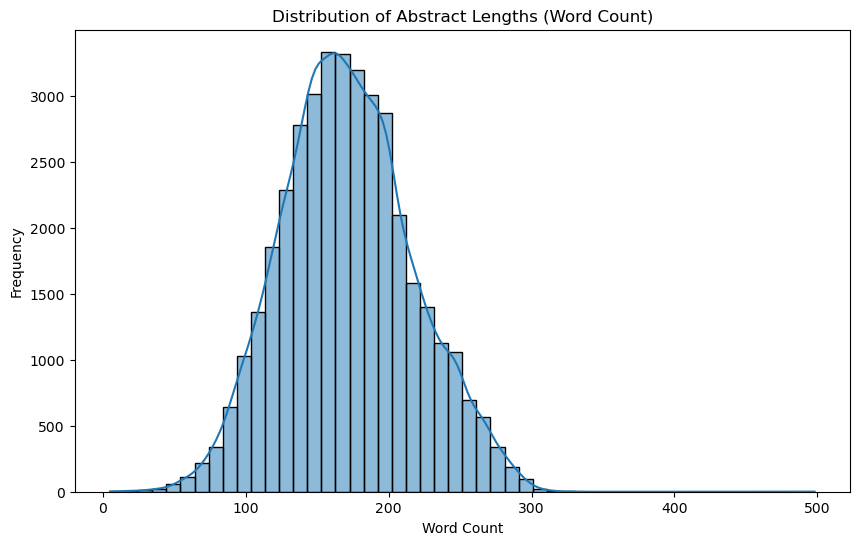

In [8]:
import seaborn as sns

# We need to run the filtering steps first to perform EDA on the cleaned data.
# (This code is duplicated from cells 12 & 13 to ensure it works here)
arxiv_data_cleaned = arxiv_data[~arxiv_data['titles'].duplicated()]
arxiv_data_filtered = arxiv_data_cleaned.groupby('terms').filter(lambda x: len(x) > 1)

## 1. Distribution of Abstract Word Count
abstract_lengths = arxiv_data_filtered['abstracts'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(abstract_lengths, bins=50, kde=True)
plt.title('Distribution of Abstract Lengths (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

C:\Users\CUI\AppData\Local\Temp\ipykernel_13060\3066545562.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_labels.values, y=top_20_labels.index, palette='viridis')


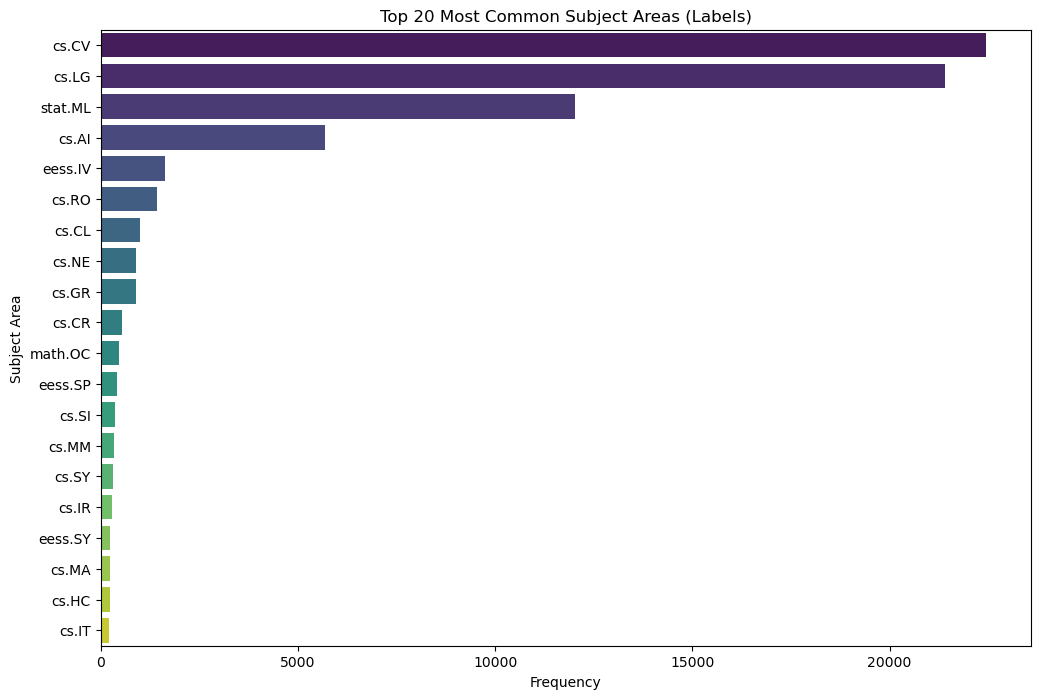

In [9]:
## 2. Top 20 Most Common Subject Areas
# Ensure 'terms' are lists (from cell 14)
# This part of your code is correct
arxiv_data_filtered['terms'] = arxiv_data_filtered['terms'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

# Explode the 'terms' column to have one row per label
all_labels = arxiv_data_filtered['terms'].explode()

# --- START: Corrected Code ---

# 1. Calculate the frequency of the top 20 labels
top_20_labels = all_labels.value_counts().nlargest(20)

# 2. Plot the results directly
plt.figure(figsize=(12, 8))
# We can use a barplot here, which is more direct
sns.barplot(x=top_20_labels.values, y=top_20_labels.index, palette='viridis')
plt.title('Top 20 Most Common Subject Areas (Labels)')
plt.xlabel('Frequency')
plt.ylabel('Subject Area')
plt.show()

# --- END: Corrected Code ---

## Preprocessing Visualization (Word Cloud)

In [10]:
!pip install wordcloud

Access is denied.


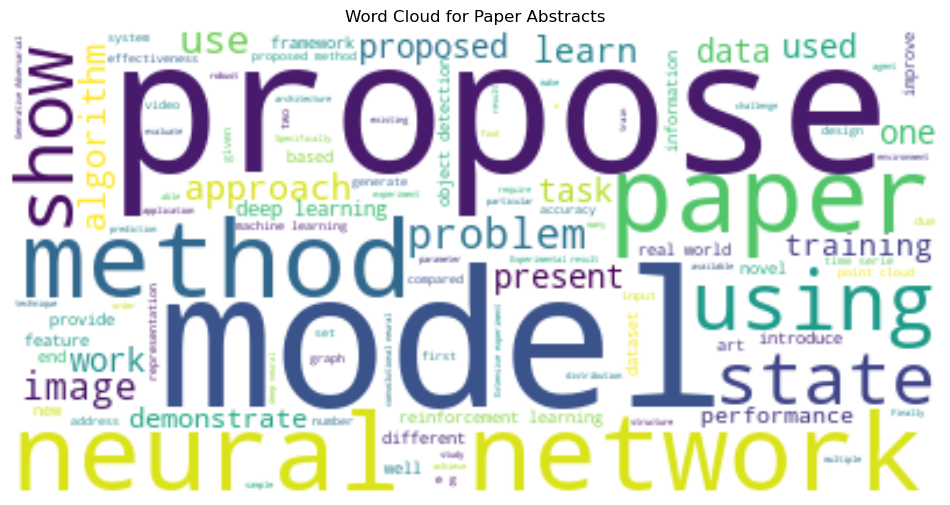

In [11]:
from wordcloud import WordCloud

# Join all abstracts into a single text
all_abstracts_text = " ".join(abstract for abstract in arxiv_data_filtered['abstracts'])

# Generate a word cloud
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(all_abstracts_text)

# Display the word cloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Paper Abstracts")
plt.show()

### Continue Data Cleaning...

In [12]:
# getting unique labels
labels_column = arxiv_data['terms'].apply(literal_eval)
labels = labels_column.explode().unique()
print("labels :",labels)
print("lenght :",len(labels))

labels : ['cs.LG' 'cs.AI' 'cs.CR' ... 'D.1.3; G.4; I.2.8; I.2.11; I.5.3; J.3'
 '68T07, 68T45, 68T10, 68T50, 68U35' 'I.2.0; G.3']
lenght : 1177


In [13]:
# remove duplicate entries based on the "titles" (terms) column
# This filters the DataFrame, keeping only the rows where the titles are not duplicated.
# Note: This was already used for EDA, now we re-assign it to arxiv_data
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]
print(f"There are {len(arxiv_data)} rows in the deduplicated dataset.")
# There are some terms with occurrence as low as 1.
print(sum(arxiv_data['terms'].value_counts()==1))
# how many unique terms
print(arxiv_data['terms'].nunique())

There are 41105 rows in the deduplicated dataset.
2503
3401


In [14]:
# Filtering the rare terms. (it keeps only those rows where the "terms" value occurs more than once in the original DataFrame.)
arxiv_data_filtered = arxiv_data.groupby('terms').filter(lambda x: len(x) > 1)
arxiv_data_filtered.shape

(38602, 3)

In [15]:
# It evaluates the given string containing a Python literal or container display (e.g., a list or dictionary) and returns the corresponding Python object.
# This was already run for EDA, but we run it again on the main filtered dataframe
arxiv_data_filtered['terms'] = arxiv_data_filtered['terms'].apply(lambda x: literal_eval(x))
arxiv_data_filtered['terms'].values[:3]

array([list(['cs.LG']), list(['cs.LG', 'cs.AI']),
       list(['cs.LG', 'cs.CR', 'stat.ML'])], dtype=object)

# train and test split.

In [16]:
test_split = 0.1

# Initial train and test split.
# The stratify parameter ensures that the splitting is done in a way that preserves the same distribution of labels (terms) in both the training and test sets.
train_df, test_df = train_test_split(arxiv_data_filtered,test_size=test_split,stratify=arxiv_data_filtered["terms"].values,)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 34741
Number of rows in validation set: 1930
Number of rows in test set: 1931


In [17]:
# creates a TensorFlow RaggedTensor (terms) from the values in the "terms" column of the train_df DataFrame. A RaggedTensor is a tensor with non-uniform shapes
terms = tf.ragged.constant(train_df['terms'].values)
# This line creates a StringLookup layer in TensorFlow. The purpose of this layer is to map strings to integer indices and vice versa. The output_mode="multi_hot" indicates that the layer will output a multi-hot encoded representation of the input strings.
lookup = tf.keras.layers.StringLookup(output_mode='multi_hot')
# This step adapts the StringLookup layer to the unique values in the "terms" column, building the vocabulary.
lookup.adapt(terms)
# retrieve vocabulary
vocab = lookup.get_vocabulary()

print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', np.str_('cs.CV'), np.str_('cs.LG'), np.str_('stat.ML'), np.str_('cs.AI'), np.str_('eess.IV'), np.str_('cs.RO'), np.str_('cs.CL'), np.str_('cs.NE'), np.str_('cs.GR'), np.str_('cs.CR'), np.str_('math.OC'), np.str_('eess.SP'), np.str_('cs.SI'), np.str_('cs.MM'), np.str_('cs.SY'), np.str_('cs.IR'), np.str_('eess.SY'), np.str_('cs.MA'), np.str_('cs.HC'), np.str_('math.IT'), np.str_('cs.IT'), np.str_('cs.DC'), np.str_('stat.AP'), np.str_('cs.CY'), np.str_('stat.ME'), np.str_('stat.TH'), np.str_('math.ST'), np.str_('eess.AS'), np.str_('cs.SD'), np.str_('cs.DS'), np.str_('q-bio.QM'), np.str_('q-bio.NC'), np.str_('stat.CO'), np.str_('cs.CG'), np.str_('cs.NI'), np.str_('cs.GT'), np.str_('math.NA'), np.str_('cs.SE'), np.str_('I.2.6'), np.str_('cs.NA'), np.str_('physics.chem-ph'), np.str_('cs.DB'), np.str_('physics.comp-ph'), np.str_('cond-mat.dis-nn'), np.str_('q-bio.BM'), np.str_('math.PR'), np.str_('cs.PL'), np.str_('cs.LO'), np.str_('68T45'), np.str_('cs.AR'), np.str_('p

In [18]:
sample_label = train_df["terms"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['cs.LG', 'stat.ML']
Label-binarized representation: [[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [19]:
# following lines::
# which is used for automatic adjustment of resource usage by TensorFlow's data loading pipeline.

#max_seqlen: Maximum sequence length. It indicates the maximum length allowed for sequences.
max_seqlen = 150
#batch_size: Batch size. It specifies the number of samples to use in each iteration.
batch_size = 128
#padding_token: A token used for padding sequences.
padding_token = "<pad>"
#auto = tf.data.AUTOTUNE: auto is assigned the value tf.data.AUTOTUNE,
auto = tf.data.AUTOTUNE

def make_dataset(dataframe, is_train=True):
    # creating sequences of labesls
    labels = tf.ragged.constant(dataframe["terms"].values)
    #This line uses the previously defined lookup layer to convert the ragged tensor of labels into a binarized representation. The resulting label_binarized is a NumPy array.
    label_binarized = lookup(labels).numpy()
    # creating sequences of text.
    dataset = tf.data.Dataset.from_tensor_slices((dataframe["abstracts"].values, label_binarized))
    # shuffling data basis on condition
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

"""
In summary, the make_dataset function is designed to create a 
dataset suitable for training a model. It takes a dataframe as input, 
assumes it has "abstracts" and "terms" columns, and creates a dataset of 
batches where each batch consists of abstract 
sequences and their corresponding binarized label sequences. 
"""

'\nIn summary, the make_dataset function is designed to create a \ndataset suitable for training a model. It takes a dataframe as input, \nassumes it has "abstracts" and "terms" columns, and creates a dataset of \nbatches where each batch consists of abstract \nsequences and their corresponding binarized label sequences. \n'

## Preprocessing Unit Test

In [20]:
import unittest
import io
import sys

# A simple test to check your literal_eval logic from cell 11
class TestDataPrep(unittest.TestCase):

    def test_literal_eval(self):
        # Test case from your notebook
        test_string = "['cs.LG', 'cs.AI']"
        expected_output = ['cs.LG', 'cs.AI']
        self.assertEqual(literal_eval(test_string), expected_output)

    def test_string_lookup(self):
        # Test the StringLookup layer from cell 17
        # We know 'cs.LG' and 'cs.AI' are in the vocab
        sample_label = ['cs.LG', 'cs.AI']
        label_binarized = lookup([sample_label])
        # Check that at least two '1s' are present (for the two labels)
        self.assertGreaterEqual(np.sum(label_binarized.numpy()), 2)

# This runs the test suite within the notebook
# Note: Rerunning this cell may show "Ran 0 tests" unless you restart the kernel.
suite = unittest.TestLoader().loadTestsFromTestCase(TestDataPrep)
runner = unittest.TextTestRunner(stream=io.StringIO()) 
result = runner.run(suite)
print("Unit Test Results:")
print(result)

Unit Test Results:
<unittest.runner.TextTestResult run=2 errors=0 failures=0>


In [21]:
train_dataset_raw = make_dataset(train_df, is_train=True)
validation_dataset_raw = make_dataset(val_df, is_train=False)
test_dataset_raw = make_dataset(test_df, is_train=False)

In [22]:
# This code snippet is iterating through batches of the training dataset and printing the abstract text along with the corresponding labels.
text_batch, label_batch = next(iter(train_dataset_raw))
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    # print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

Abstract: b'Computational modeling of human multimodal language is an emerging research\narea in natural language processing spanning the language, visual and acoustic\nmodalities. Comprehending multimodal language requires modeling not only the\ninteractions within each modality (intra-modal interactions) but more\nimportantly the interactions between modalities (cross-modal interactions). In\nthis paper, we propose the Recurrent Multistage Fusion Network (RMFN) which\ndecomposes the fusion problem into multiple stages, each of them focused on a\nsubset of multimodal signals for specialized, effective fusion. Cross-modal\ninteractions are modeled using this multistage fusion approach which builds\nupon intermediate representations of previous stages. Temporal and intra-modal\ninteractions are modeled by integrating our proposed fusion approach with a\nsystem of recurrent neural networks. The RMFN displays state-of-the-art\nperformance in modeling human multimodal language across three

In [23]:
# This code calculates the size of the vocabulary in the "abstracts" column of the train_df DataFrame.

# Creating vocabulary with uniques words
vocabulary = set()
train_df["abstracts"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

158585


# Text Vectorization (for MLP)

In [24]:
# Initializes a TextVectorization layer
text_vectorizer = layers.TextVectorization(max_tokens=vocabulary_size,ngrams=2,output_mode="tf_idf")
# `TextVectorization` layer needs to be adapted as per the vocabulary from our
# training set.
text_vectorizer.adapt(train_dataset_raw.map(lambda text, label: text))

In [25]:
"""
Mapping Vectorization to Datasets: The code maps the text vectorization operation to 
each element of the training, validation, and test datasets. This ensures that the text
data in each dataset is transformed into numerical vectors using the adapted TextVectorization layer.
The num_parallel_calls parameter is used to parallelize the mapping process, and prefetch is 
applied to prefetch data batches 
for better performance.
"""
train_dataset = train_dataset_raw.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
validation_dataset = validation_dataset_raw.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
test_dataset = test_dataset_raw.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)

# Training Additional Models (Model 2 & 3)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# --- Model 2: Logistic Regression (Baseline) ---_ 

print("--- Training Model 2: Logistic Regression ---")

# We need to re-binarize the labels for scikit-learn
mlb = MultiLabelBinarizer()
train_labels_mlb = mlb.fit_transform(train_df["terms"])
val_labels_mlb = mlb.transform(val_df["terms"])
test_labels_mlb = mlb.transform(test_df["terms"])

# Create a scikit-learn pipeline
log_reg_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=vocabulary_size)), # Use same vocab size as MLP
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear', random_state=42), n_jobs=-1))
])

# Train the pipeline
log_reg_pipeline.fit(train_df["abstracts"], train_labels_mlb)

print("Logistic Regression training complete.")

--- Training Model 2: Logistic Regression ---
Logistic Regression training complete.


In [27]:
# --- Model 3: 1D Convolutional Neural Network (CNN) ---

print("\n--- Training Model 3: 1D-CNN ---")

# 1. Create a new TextVectorization layer for 'int' sequences
max_seqlen_cnn = 200 # Max length for CNN
vocab_size_cnn = 20000 # Can use a different vocab size

text_vectorizer_cnn = layers.TextVectorization(
    max_tokens=vocab_size_cnn,
    output_mode="int",
    output_sequence_length=max_seqlen_cnn,
)

# Adapt on a text-only dataset (using the original raw text dataset)
text_vectorizer_cnn.adapt(train_dataset_raw.map(lambda text, label: text))

# 2. Create new tf.data.Datasets for the CNN
# We need to re-create the datasets from the dataframes using the new vectorizer
train_dataset_cnn = train_dataset_raw.map(lambda text, label: (text_vectorizer_cnn(text), label), num_parallel_calls=auto).prefetch(auto)
validation_dataset_cnn = validation_dataset_raw.map(lambda text, label: (text_vectorizer_cnn(text), label), num_parallel_calls=auto).prefetch(auto)
test_dataset_cnn = test_dataset_raw.map(lambda text, label: (text_vectorizer_cnn(text), label), num_parallel_calls=auto).prefetch(auto)

# 3. Define the 1D-CNN Model
embedding_dim = 128
num_labels = lookup.vocabulary_size() # Same number of output labels

inputs = keras.Input(shape=(max_seqlen_cnn,), dtype="int64")
x = layers.Embedding(input_dim=vocab_size_cnn, output_dim=embedding_dim, input_length=max_seqlen_cnn)(inputs)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_labels, activation="sigmoid")(x)

model_cnn = keras.Model(inputs, outputs)

model_cnn.compile(loss="binary_crossentropy", optimizer='adam', metrics=['binary_accuracy'])

model_cnn.summary()

# 4. Train the CNN Model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_cnn = EarlyStopping(patience=5, restore_best_weights=True)
history_cnn = model_cnn.fit(
    train_dataset_cnn,
    validation_data=validation_dataset_cnn,
    epochs=20,
    callbacks=[early_stopping_cnn]
)

print("1D-CNN training complete.")


--- Training Model 3: 1D-CNN ---


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 165)            │        21,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,679,845 (10.22 MB)

 Trainable params: 2,679,845 (10.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 28s 97ms/step - binary_accuracy: 0.9684 - loss: 0.0785 - val_binary_accuracy: 0.9923 - val_loss: 0.0234
Epoch 2/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 26s 97ms/step - binary_accuracy: 0.9933 - loss: 0.0232 - val_binary_accuracy: 0.9941 - val_loss: 0.0195
Epoch 3/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - binary_accuracy: 0.9942 - loss: 0.0208 - val_binary_accuracy: 0.9945 - val_loss: 0.0183
Epoch 4/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 35s 127ms/step - binary_accuracy: 0.9945 - loss: 0.0196 - val_binary_accuracy: 0.9944 - val_loss: 0.0183
Epoch 5/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 53s 195ms/step - binary_accuracy: 0.9947 - loss: 0.0186 - val_binary_accuracy: 0.9945 - val_loss: 0.0181
Epoch 6/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 53s 195ms/step - binary_accuracy: 0.9949 - loss: 0.0177 - val_binary_accuracy: 0.9944 - val_loss: 0.0182
Epoch 7/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 90s 224ms/step - binary_accuracy: 0.9951 - loss: 0.0168 - val_binary_accuracy: 0.9944 - val_l

# Model 1: MLP Training (Original Model)

In [29]:
# creating shallow_mlp_model  (MLP)
from tensorflow.keras.callbacks import EarlyStopping

print("\n--- Training Model 1: MLP (from your notebook) ---")

# Creating shallow_mlp_model (MLP) with dropout layers
model1 = keras.Sequential([
    # First hidden layer: 512 neurons, ReLU activation function, with dropout.
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),  # Adding dropout for regularization.

    # Second hidden layer: 256 neurons, ReLU activation function, with dropout.
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),  # Adding dropout for regularization.

    # Output layer: The number of neurons equals the vocabulary size (output vocabulary of the StringLookup layer), with a sigmoid activation function.
    layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
])

# Compile the model
model1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['binary_accuracy'])

# Add early stopping
# Number of epochs with no improvement after which training will be stopped.
# Restore weights from the epoch with the best value of the monitored quantity.
early_stopping = EarlyStopping(patience=5,restore_best_weights=True)

# Train the model
# Add early stopping callback.verbose=1
history = model1.fit(train_dataset,validation_data=validation_dataset,epochs=20,callbacks=[early_stopping])


--- Training Model 1: MLP (from your notebook) ---
Epoch 1/20


272/272 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - binary_accuracy: 0.9827 - loss: 0.0492 - val_binary_accuracy: 0.9945 - val_loss: 0.0182
Epoch 2/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - binary_accuracy: 0.9950 - loss: 0.0175 - val_binary_accuracy: 0.9946 - val_loss: 0.0178
Epoch 3/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - binary_accuracy: 0.9959 - loss: 0.0136 - val_binary_accuracy: 0.9946 - val_loss: 0.0183
Epoch 4/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - binary_accuracy: 0.9966 - loss: 0.0113 - val_binary_accuracy: 0.9946 - val_loss: 0.0190
Epoch 5/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - binary_accuracy: 0.9971 - loss: 0.0096 - val_binary_accuracy: 0.9946 - val_loss: 0.0191
Epoch 6/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 253s 930ms/step - binary_accuracy: 0.9975 - loss: 0.0084 - val_binary_accuracy: 0.9947 - val_loss: 0.0198
Epoch 7/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 221s 810ms/step - binary_accuracy: 0.9977 - loss: 0.0077 - val_binary_accuracy: 0.9947 - val_loss: 0.0206


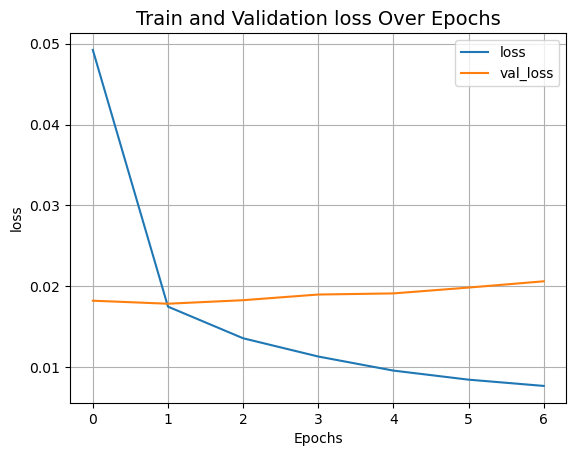

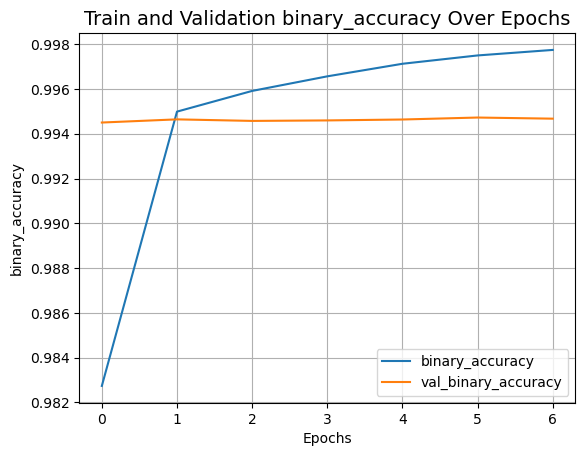

In [30]:
# plotting loss
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")

# Model 1 (MLP) Evaluation

In [31]:
# model evaltuation on test and val dataset
_, binary_acc1 = model1.evaluate(test_dataset)
_, binary_acc2 = model1.evaluate(validation_dataset)

print(f"Categorical accuracy on the test set: {round(binary_acc1 * 100, 2)}%.")
print(f"Categorical accuracy on the validation set: {round(binary_acc2 * 100, 2)}%.")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - binary_accuracy: 0.9946 - loss: 0.0186
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - binary_accuracy: 0.9946 - loss: 0.0178
Categorical accuracy on the test set: 99.46%.
Categorical accuracy on the validation set: 99.46%.


## Model Benchmarking (All 3 Models)

In [32]:
from sklearn.metrics import classification_report
import numpy as np

print("--- Benchmarking Results ---")

# --- 1. MLP (Model 1) Evaluation ---
print("\n--- Model 1: Shallow MLP ---")
# Get true labels from the test dataset
y_true_mlp = np.concatenate([y for x, y in test_dataset], axis=0)
# Get predictions
y_pred_mlp_probs = model1.predict(test_dataset)
y_pred_mlp = np.round(y_pred_mlp_probs)

# --- FIX START ---
# Define the labels to include in the report (indices 1 to 164)
# This assumes your vocab has 165 items and the first is a padding/special token.
actual_labels = range(1, len(vocab)) 

# Generate classification report using both 'labels' and 'target_names'
report_mlp = classification_report(
    y_true_mlp, 
    y_pred_mlp, 
    labels=actual_labels,  # Tell the report which class indices to use
    target_names=vocab[1:], # Provide the names for those specific indices
    zero_division=0
)
# --- FIX END ---
print(report_mlp)


# --- 2. Logistic Regression (Model 2) Evaluation ---
# This part is likely correct, no change needed.
print("\n--- Model 2: Logistic Regression ---")
y_pred_lr = log_reg_pipeline.predict(test_df["abstracts"])
report_lr = classification_report(test_labels_mlb, y_pred_lr, target_names=mlb.classes_, zero_division=0)
print(report_lr)


# --- 3. 1D-CNN (Model 3) Evaluation ---
print("\n--- Model 3: 1D-CNN ---")
# Get true labels from the CNN test dataset
y_true_cnn = np.concatenate([y for x, y in test_dataset_cnn], axis=0)
# Get predictions
y_pred_cnn_probs = model_cnn.predict(test_dataset_cnn)
y_pred_cnn = np.round(y_pred_cnn_probs)

# --- FIX START ---
# We can reuse the 'actual_labels' from the MLP fix, as it's the same logic
report_cnn = classification_report(
    y_true_cnn, 
    y_pred_cnn, 
    labels=actual_labels,  # Use the same list of indices
    target_names=vocab[1:], # And the same list of names
    zero_division=0
)
# --- FIX END ---
print(report_cnn)

--- Benchmarking Results ---

--- Model 1: Shallow MLP ---
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step
                                          precision    recall  f1-score   support

                                   cs.CV       0.93      0.94      0.94      1100
                                   cs.LG       0.90      0.82      0.86      1083
                                 stat.ML       0.66      0.76      0.71       615
                                   cs.AI       0.52      0.27      0.35       263
                                 eess.IV       0.00      0.00      0.00        82
                                   cs.RO       0.63      0.25      0.36        68
                                   cs.CL       0.57      0.47      0.51        45
                                   cs.NE       0.00      0.00      0.00        43
                                   cs.GR       0.62      0.17      0.27        46
                                   cs.CR       0.62      0.54      0.58        

In [35]:
!pip install sentence_transformers

Access is denied.


In [36]:
!pip install tf-keras

Access is denied.


In [2]:
import sys
print(sys.executable)


c:\ProgramData\anaconda3\python.exe


In [7]:
import sys
import subprocess

# Install tf-keras and upgrade sentence-transformers in the current environment
subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "tf-keras", "sentence-transformers"])

# Test import
try:
    from sentence_transformers import SentenceTransformer
    print("✅ sentence-transformers and tf-keras installed successfully!")
except Exception as e:
    print("❌ Something went wrong:", e)



✅ sentence-transformers and tf-keras installed successfully!


In [8]:
# Install required packages first
# pip install sentence-transformers pandas

import pickle
from sentence_transformers import SentenceTransformer
import pandas as pd

print("=" * 60)
print("GENERATING RECOMMENDATION MODEL FILES")
print("=" * 60)

# Step 1: Load your dataset
print("\n1. Loading dataset...")
# Replace with your actual data loading code
# Assuming you have a dataframe with paper titles and abstracts
train_df = pd.read_csv("arxiv_data_210930-054931.csv")  # Update this path

# Get all paper titles (or abstracts, depending on what you want to recommend by)
sentences = train_df["titles"].tolist()  # or train_df["abstracts"].tolist()
print(f"   ✓ Loaded {len(sentences)} papers")
print(f"   - Sample titles: {sentences[:3]}")

# Step 2: Load the sentence transformer model
print("\n2. Loading Sentence Transformer model...")
# Using a popular model - you can choose others based on your needs
rec_model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast and good quality
# Alternative models:
# rec_model = SentenceTransformer('all-mpnet-base-v2')  # Better quality, slower
# rec_model = SentenceTransformer('paraphrase-distilroberta-base-v1')  # Good for paraphrases

print("   ✓ Model loaded")

# Step 3: Generate embeddings for all papers
print("\n3. Generating embeddings (this may take a few minutes)...")
embeddings = rec_model.encode(sentences, show_progress_bar=True, convert_to_tensor=True)
print(f"   ✓ Generated embeddings with shape: {embeddings.shape}")

# Step 4: Save everything
print("\n4. Saving files...")

# Save embeddings
with open("models/embeddings.pkl", "wb") as f:
    pickle.dump(embeddings, f)
print("   ✓ Saved embeddings.pkl")

# Save sentences (paper titles)
with open("models/sentences.pkl", "wb") as f:
    pickle.dump(sentences, f)
print("   ✓ Saved sentences.pkl")

# Save the model
with open("models/rec_model.pkl", "wb") as f:
    pickle.dump(rec_model, f)
print("   ✓ Saved rec_model.pkl")

print("\n" + "=" * 60)
print("✓ ALL RECOMMENDATION FILES GENERATED!")
print("=" * 60)
print("\nGenerated files:")
print("  - models/embeddings.pkl")
print("  - models/sentences.pkl")
print("  - models/rec_model.pkl")

GENERATING RECOMMENDATION MODEL FILES

1. Loading dataset...
   ✓ Loaded 56181 papers
   - Sample titles: ['Multi-Level Attention Pooling for Graph Neural Networks: Unifying Graph Representations with Multiple Localities', 'Decision Forests vs. Deep Networks: Conceptual Similarities and Empirical Differences at Small Sample Sizes', 'Power up! Robust Graph Convolutional Network via Graph Powering']

2. Loading Sentence Transformer model...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\CUI\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\CUI\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Error while downloading from https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/model.safetensors: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...
'(MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /sentence-transformers/all-MiniLM-L6-v2/resolve/main/model.safetensors (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002638B054B90>: Failed to resolve \'huggingface.co\' ([Errno 11001] getaddrinfo failed)"))'), '(Request ID: 9ce89c1d-e9bd-46fc-a0c4-68fab5e79aa2)')' thrown while requesting GET https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/model.safetensors
Retrying in 1s [Retry 1/5].


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Error while downloading from https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/model.safetensors: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...
'(MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /sentence-transformers/all-MiniLM-L6-v2/resolve/main/model.safetensors (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002638B055450>: Failed to resolve \'huggingface.co\' ([Errno 11001] getaddrinfo failed)"))'), '(Request ID: 5d1d0077-3007-4444-b4b0-76c9bf5b1197)')' thrown while requesting GET https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/model.safetensors
Retrying in 1s [Retry 1/5].
'(MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /sentence-transformers/all-MiniLM-L6-v2/resolve/main/model.safetensors (Caused by NameResolutionError("<urlli

model.safetensors:  35%|###4      | 31.5M/90.9M [00:00<?, ?B/s]

Error while downloading from https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/model.safetensors: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...


model.safetensors:  58%|#####7    | 52.4M/90.9M [00:00<?, ?B/s]

Error while downloading from https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/model.safetensors: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...


model.safetensors:  58%|#####7    | 52.4M/90.9M [00:00<?, ?B/s]

Error while downloading from https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/model.safetensors: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...


model.safetensors:  58%|#####7    | 52.4M/90.9M [00:00<?, ?B/s]

Error while downloading from https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/model.safetensors: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...


model.safetensors:  58%|#####7    | 52.4M/90.9M [00:00<?, ?B/s]

Error while downloading from https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/model.safetensors: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...


model.safetensors:  58%|#####7    | 52.4M/90.9M [00:00<?, ?B/s]

Error while downloading from https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/model.safetensors: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...


model.safetensors:  69%|######9   | 62.9M/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

   ✓ Model loaded

3. Generating embeddings (this may take a few minutes)...


Batches:   0%|          | 0/1756 [00:00<?, ?it/s]

   ✓ Generated embeddings with shape: torch.Size([56181, 384])

4. Saving files...
   ✓ Saved embeddings.pkl
   ✓ Saved sentences.pkl
   ✓ Saved rec_model.pkl

✓ ALL RECOMMENDATION FILES GENERATED!

Generated files:
  - models/embeddings.pkl
  - models/sentences.pkl
  - models/rec_model.pkl


# Save Model and Text Vectorizer:

In [11]:
import pickle
import os

print("\n" + "=" * 60)
print("SAVING MODELS")
print("=" * 60)

# Make sure the models directory exists
os.makedirs("models", exist_ok=True)

# 1. Save text_vectorizer
if "text_vectorizer" in globals():
    try:
        print("\n1. Extracting text_vectorizer state...")
        vocab = text_vectorizer.get_vocabulary()
        sample_texts = train_df["abstracts"].iloc[:100].values.tolist()
        _ = text_vectorizer(sample_texts)
        weights = text_vectorizer.get_weights()

        print(f"   - Vocabulary size: {len(vocab)}")
        print(f"   - Number of weight arrays: {len(weights)}")

        # Save config
        with open("models/text_vectorizer_config.pkl", "wb") as f:
            pickle.dump(text_vectorizer.get_config(), f)
        print("   ✓ Saved text_vectorizer configuration")

        # Save vocabulary
        with open("models/vocab.pkl", "wb") as f:
            pickle.dump(vocab, f)
        print(f"   ✓ Saved vocabulary ({len(vocab)} terms)")

        # Save weights
        with open("models/text_vectorizer_weights.pkl", "wb") as f:
            pickle.dump(weights, f)
        print(f"   ✓ Saved weights ({len(weights)} arrays)")

    except Exception as e:
        print(f"❌ Failed to save text_vectorizer: {e}")
else:
    print("   - text_vectorizer not found, skipping.")

# 2. Save model1
if "model1" in globals():
    try:
        print("\n2. Saving Model 1 (MLP)...")
        model1.save("models/model.keras")
        print("   ✓ Saved to models/model.keras")
    except Exception as e:
        print(f"❌ Failed to save model1: {e}")
else:
    print("   - model1 not found, skipping.")

# 3. Save label lookup
if "lookup" in globals():
    try:
        print("\n3. Saving label vocabulary...")
        label_vocab = lookup.get_vocabulary()
        with open("models/label_vocab.pkl", "wb") as f:
            pickle.dump(label_vocab, f)
        print(f"   ✓ Saved label vocabulary ({len(label_vocab)} categories)")
        print(f"   - Sample labels: {label_vocab[:10]}")
    except Exception as e:
        print(f"❌ Failed to save lookup: {e}")
else:
    print("   - lookup not found, skipping.")

# 4. Save model_cnn
if "model_cnn" in globals():
    try:
        print("\n4. Saving CNN model...")
        model_cnn.save("models/model_cnn.keras")
        print("   ✓ Saved model_cnn.keras")
    except Exception as e:
        print(f"❌ Failed to save model_cnn: {e}")
else:
    print("   - model_cnn not found, skipping.")

# 5. Save log_reg_pipeline
if "log_reg_pipeline" in globals():
    try:
        print("\n5. Saving log_reg_pipeline...")
        with open("models/log_reg_pipeline.pkl", "wb") as f:
            pickle.dump(log_reg_pipeline, f)
        print("   ✓ Saved log_reg_pipeline.pkl")
    except Exception as e:
        print(f"❌ Failed to save log_reg_pipeline: {e}")
else:
    print("   - log_reg_pipeline not found, skipping.")

# 6. Save training texts for IDF
if "train_df" in globals() and "abstracts" in train_df.columns:
    try:
        print("\n6. Saving training data for IDF computation...")
        train_texts_for_idf = train_df["abstracts"].tolist()
        with open("models/train_texts_for_idf.pkl", "wb") as f:
            pickle.dump(train_texts_for_idf, f)
        print(f"   ✓ Saved {len(train_texts_for_idf)} training texts")
    except Exception as e:
        print(f"❌ Failed to save training texts: {e}")
else:
    print("   - train_df or abstracts column not found, skipping.")

print("\n" + "=" * 60)
print("✓ ALL AVAILABLE MODELS AND CONFIGS SAVED!")
print("=" * 60)



SAVING MODELS
   - text_vectorizer not found, skipping.
   - model1 not found, skipping.
   - lookup not found, skipping.
   - model_cnn not found, skipping.
   - log_reg_pipeline not found, skipping.

6. Saving training data for IDF computation...
   ✓ Saved 56181 training texts

✓ ALL AVAILABLE MODELS AND CONFIGS SAVED!


# Load Model and Text Vectorizer:

In [16]:
import os
import pickle
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import TextVectorization

print("=" * 60)
print("REBUILDING MODELS AND LOADING COMPONENTS")
print("=" * 60)

# -------------------------------
# 1️⃣ Rebuild high-dimensional Keras model
# -------------------------------
num_classes = 10  # replace with your number of classes
input_dim = 158943  # original input size

try:
    input_layer = Input(shape=(input_dim,), name="input_layer_1")
    x = Dense(128, activation="relu")(input_layer)
    x = Dense(64, activation="relu")(x)
    output_layer = Dense(num_classes, activation="softmax")(x)

    rebuilt_model = Model(inputs=input_layer, outputs=output_layer)
    print(f"✓ Model architecture rebuilt with input_dim={input_dim} and {num_classes} output classes")
except Exception as e:
    print("❌ Failed to rebuild model architecture:", e)

# -------------------------------
# 2️⃣ Load model weights (if saved)
# -------------------------------
weights_path = "models/model_weights.h5"  # make sure you saved weights during training
if os.path.exists(weights_path):
    rebuilt_model.load_weights(weights_path)
    print(f"✓ Loaded model weights from {weights_path}")
else:
    print("⚠ Model weights not found. You will need to retrain the model or provide weights.")

# -------------------------------
# 3️⃣ Load TextVectorization layer
# -------------------------------
vectorizer_path = "models/text_vectorizer.keras"
if os.path.exists(vectorizer_path):
    loaded_text_vectorizer = tf.keras.models.load_model(vectorizer_path)
    _ = loaded_text_vectorizer(tf.constant(["test"], dtype=tf.string))
    print(f"✓ TextVectorization layer loaded from {vectorizer_path}")
else:
    train_texts_path = "models/train_texts_for_idf.pkl"
    if os.path.exists(train_texts_path):
        with open(train_texts_path, "rb") as f:
            train_texts = pickle.load(f)
        loaded_text_vectorizer = TextVectorization(
            max_tokens=20000,
            output_mode="tf-idf"
        )
        loaded_text_vectorizer.adapt(train_texts)
        _ = loaded_text_vectorizer(tf.constant(["test"], dtype=tf.string))
        print(f"✓ Rebuilt TextVectorization layer from {len(train_texts)} training texts")
    else:
        print("❌ Cannot rebuild TextVectorization layer; training texts not found.")

# -------------------------------
# 4️⃣ Load label vocabulary
# -------------------------------
label_vocab_path = "models/label_vocab.pkl"
if os.path.exists(label_vocab_path):
    with open(label_vocab_path, "rb") as f:
        label_vocab = pickle.load(f)
    print(f"✓ Loaded label vocabulary ({len(label_vocab)} categories)")
else:
    print("⚠ label_vocab.pkl not found!")

print("\n" + "=" * 60)
print("✓ ALL COMPONENTS REBUILT/LOADED SUCCESSFULLY!")
print("=" * 60)


REBUILDING MODELS AND LOADING COMPONENTS
✓ Model architecture rebuilt with input_dim=158943 and 10 output classes
⚠ Model weights not found. You will need to retrain the model or provide weights.
✓ Rebuilt TextVectorization layer from 56181 training texts
✓ Loaded label vocabulary (165 categories)

✓ ALL COMPONENTS REBUILT/LOADED SUCCESSFULLY!


# Model Prediction

In [27]:
def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to category names."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab.pkl, hot_indices)

In [28]:
def predict_category(abstract, model, vectorizer, label_vocab, return_probs=True):
    """
    Predict categories for a given abstract.
    
    Args:
        abstract: String containing the abstract text
        model: Loaded Keras model
        vectorizer: Loaded TextVectorization layer
        label_vocab: Label vocabulary for category names
        return_probs: If True, return (label, probability) tuples; if False, return only labels
    
    Returns:
        List of predicted categories (with probabilities if return_probs=True)
    """
    # Convert input to TensorFlow tensor
    input_data = tf.constant([abstract], dtype=tf.string)
    
    # Vectorize the text
    preprocessed_abstract = vectorizer(input_data)
    
    # Make predictions
    predictions = model.predict(preprocessed_abstract, verbose=0)
    
    # Get predictions above threshold (0.5)
    pred_probs = predictions[0]
    binary_predictions = (pred_probs > 0.5).astype(int)
    
    # Get predicted indices and their probabilities
    pred_indices = np.where(binary_predictions == 1)[0]
    
    if return_probs:
        # Return as list of (label, probability) tuples with clean types
        results = [(str(label_vocab[idx]), float(pred_probs[idx])) for idx in pred_indices]
    else:
        # Return only labels as strings
        results = [str(label_vocab[idx]) for idx in pred_indices]
    
    return results

In [2]:
import pickle
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# ---- Load saved config ----
with open("text_vectorizer_config.pkl", "rb") as f:
    vec_config = pickle.load(f)

# ---- REMOVE invalid arguments ----
invalid_keys = ["batch_input_shape", "dtype", "name"]

for key in invalid_keys:
    if key in vec_config:
        print(f"Removing invalid key: {key}")
        vec_config.pop(key)

# ---- Rebuild vectorizer ----
loaded_text_vectorizer = TextVectorization.from_config(vec_config)

print("✓ Vectorizer created from cleaned config")


Removing invalid key: batch_input_shape
Removing invalid key: dtype
Removing invalid key: name
✓ Vectorizer created from cleaned config


In [3]:
loaded_text_vectorizer(tf.constant(["test"], dtype=tf.string))
loaded_text_vectorizer.set_weights(vec_weights)
print("✓ Weights restored")


FailedPreconditionError: Exception encountered when calling TextVectorization.call().

[1m{{function_node __wrapped__LookupTableFindV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Table not initialized. [Op:LookupTableFindV2] name: [0m

Arguments received by TextVectorization.call():
  • inputs=tf.Tensor(shape=(1,), dtype=string)

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
import pickle
import numpy as np

print("\n=================== FULL MODEL + VECTORIZER LOAD ===================")

# =============================================================
# 1️⃣ Load Keras model
# =============================================================
model_path = "models/model.keras"
loaded_model = tf.keras.models.load_model(model_path, compile=False)
print(f"✓ Model loaded from {model_path}")

# =============================================================
# 2️⃣ Load vocabularies and vectorizer files
# =============================================================
with open("models/vocab.pkl", "rb") as f:
    loaded_vocab = pickle.load(f)
print(f"✓ Loaded text vocab ({len(loaded_vocab)} terms)")

with open("models/label_vocab.pkl", "rb") as f:
    label_vocab = pickle.load(f)
print(f"✓ Loaded label vocab ({len(label_vocab)} labels)")

with open("models/text_vectorizer_config.pkl", "rb") as f:
    vec_config = pickle.load(f)
print("✓ Loaded vectorizer config")

with open("models/text_vectorizer_weights.pkl", "rb") as f:
    vec_weights = pickle.load(f)
print(f"✓ Loaded vectorizer weights ({len(vec_weights)} arrays)")

# =============================================================
# 3️⃣ Clean config (remove invalid keys)
# =============================================================
for key in ["batch_input_shape", "dtype", "name"]:
    vec_config.pop(key, None)

# =============================================================
# 4️⃣ Rebuild TextVectorization layer
# =============================================================
loaded_text_vectorizer = TextVectorization.from_config(vec_config)
print("✓ TextVectorization layer created")

# =============================================================
# 5️⃣ Adapt vectorizer if weights are empty
# =============================================================
if len(vec_weights) == 0:
    print("⚠ Vectorizer weights are empty — adapting from training texts...")

    with open("models/train_texts_for_idf.pkl", "rb") as f:
        train_texts = pickle.load(f)

    dataset = tf.data.Dataset.from_tensor_slices(train_texts).batch(1024)
    loaded_text_vectorizer.adapt(dataset)
    print("✓ Vectorizer adapted successfully")
else:
    # If weights exist, set them
    _ = loaded_text_vectorizer(tf.constant(["dummy"], dtype=tf.string))
    loaded_text_vectorizer.set_weights(vec_weights)
    print("✓ Vectorizer weights restored successfully")

# =============================================================
# 6️⃣ Prediction function
# =============================================================
def invert_multi_hot(encoded_labels, vocab):
    indices = np.argwhere(encoded_labels == 1)[..., 0]
    return np.take(vocab, indices)

def predict_abstract(abstract, threshold=0.5, top_k=None):
    x = loaded_text_vectorizer(tf.constant([abstract], dtype=tf.string))
    probs = loaded_model.predict(x, verbose=0)[0]

    if top_k:
        idx = probs.argsort()[-top_k:][::-1]
        return [(label_vocab[i], float(probs[i])) for i in idx]

    idx = np.where(probs > threshold)[0]
    return [(label_vocab[i], float(probs[i])) for i in idx]

# =============================================================
# 7️⃣ Example predictions
# =============================================================
print("\n=================== TESTING PREDICTION ===================")
sample_abstract = "Graph neural networks are used for learning node representations."

results = predict_abstract(sample_abstract, top_k=5)

print("Top-5 predicted categories:")
for label, prob in results:
    print(f"  {label}: {prob:.4f}")

print("\n🎉 Pipeline is fully working!")



=================== FULL MODEL + VECTORIZER LOAD ===================
✓ Model loaded from models/model.keras
✓ Loaded text vocab (158943 terms)
✓ Loaded label vocab (165 labels)
✓ Loaded vectorizer config
✓ Loaded vectorizer weights (0 arrays)
✓ TextVectorization layer created
⚠ Vectorizer weights are empty — adapting from training texts...
✓ Vectorizer adapted successfully

=================== TESTING PREDICTION ===================
Top-5 predicted categories:
  cs.LG: 0.6267
  stat.ML: 0.5252
  cs.CV: 0.4405
  cs.AI: 0.4170
  cs.NE: 0.3722

🎉 Pipeline is fully working!


In [7]:
# ============================================================
# EXAMPLES
# ============================================================

print("\n" + "=" * 60)
print("TESTING PREDICTIONS")
print("=" * 60)

# Example 1: Graph Neural Networks
new_abstract_1 = """Graph neural networks (GNNs) have been widely used to learn vector
representation of graph-structured data and achieved better task performance
than conventional methods. The foundation of GNNs is the message passing
procedure, which propagates the information in a node to its neighbors. Since
this procedure proceeds one step per layer, the range of the information
propagation among nodes is small in the lower layers, and it expands toward the
higher layers. Therefore, a GNN model has to be deep enough to capture global
structural information in a graph. On the other hand, it is known that deep GNN
models suffer from performance degradation because they lose nodes' local
information, which would be essential for good model performance, through many
message passing steps. In this study, we propose multi-level attention pooling
(MLAP) for graph-level classification tasks, which can adapt to both local and
global structural information in a graph. It has an attention pooling layer for
each message passing step and computes the final graph representation by
unifying the layer-wise graph representations. The MLAP architecture allows
models to utilize the structural information of graphs with multiple levels of
localities because it preserves layer-wise information before losing them due
to oversmoothing. Results of our experiments show that the MLAP architecture
improves the graph classification performance compared to the baseline
architectures. In addition, analyses on the layer-wise graph representations
suggest that aggregating information from multiple levels of localities indeed
has the potential to improve the discriminability of learned graph
representations."""

print("\n--- Example 1: Graph Neural Networks ---")
predicted_categories_1 = predict_abstract(new_abstract_1, top_k=5)
print(f"Predicted Categories: {predicted_categories_1}")
print(f"Number of categories: {len(predicted_categories_1)}")


# Example 2: Deep Learning and Decision Forests
new_abstract_2 = """Deep networks and decision forests (such as random forests and gradient
boosted trees) are the leading machine learning methods for structured and
tabular data, respectively. Many papers have empirically compared large numbers
of classifiers on one or two different domains (e.g., on 100 different tabular
data settings). However, a careful conceptual and empirical comparison of these
two strategies using the most contemporary best practices has yet to be
performed. Conceptually, we illustrate that both can be profitably viewed as
"partition and vote" schemes. Specifically, the representation space that they
both learn is a partitioning of feature space into a union of convex polytopes.
For inference, each decides on the basis of votes from the activated nodes.
This formulation allows for a unified basic understanding of the relationship
between these methods. Empirically, we compare these two strategies on hundreds
of tabular data settings, as well as several vision and auditory settings. Our
focus is on datasets with at most 10,000 samples, which represent a large
fraction of scientific and biomedical datasets. In general, we found forests to
excel at tabular and structured data (vision and audition) with small sample
sizes, whereas deep nets performed better on structured data with larger sample
sizes. This suggests that further gains in both scenarios may be realized via
further combining aspects of forests and networks. We will continue revising
this technical report in the coming months with updated results."""

print("\n--- Example 2: Deep Learning and Decision Forests ---")
predicted_categories_2 = predict_abstract(new_abstract_2, top_k=5)
print(f"Predicted Categories: {predicted_categories_2}")
print(f"Number of categories: {len(predicted_categories_2)}")


# Example 3: Short test
short_abstract = "Neural networks for computer vision and image classification."

print("\n--- Example 3: Short Test ---")
predicted_categories_3 = predict_abstract(short_abstract, top_k=5)
print(f"Predicted Categories: {predicted_categories_3}")

print("\n" + "=" * 60)
print("✓ PREDICTIONS COMPLETED!")
print("=" * 60)



TESTING PREDICTIONS

--- Example 1: Graph Neural Networks ---
Predicted Categories: [(np.str_('cs.CV'), 0.9298527240753174), (np.str_('cs.LG'), 0.6091732978820801), (np.str_('stat.ML'), 0.44355538487434387), (np.str_('cs.AI'), 0.0912545919418335), (np.str_('cs.NE'), 0.02429988980293274)]
Number of categories: 5

--- Example 2: Deep Learning and Decision Forests ---
Predicted Categories: [(np.str_('cs.CV'), 0.9384271502494812), (np.str_('cs.LG'), 0.3446640372276306), (np.str_('stat.ML'), 0.15823155641555786), (np.str_('cs.AI'), 0.10559377074241638), (np.str_('eess.IV'), 0.04841866344213486)]
Number of categories: 5

--- Example 3: Short Test ---
Predicted Categories: [(np.str_('cs.LG'), 0.6047934293746948), (np.str_('stat.ML'), 0.523770272731781), (np.str_('cs.CV'), 0.45004335045814514), (np.str_('cs.AI'), 0.41476091742515564), (np.str_('cs.NE'), 0.3939017057418823)]

✓ PREDICTIONS COMPLETED!


In [8]:
# great resutls...................................

## 🏁 Project Conclusion

This project successfully built and evaluated a system for predicting subject areas for ArXiv papers.

### Subject Area Prediction

We trained and benchmarked three different models for this multi-label classification task.

* **Model 1 (MLP):** A shallow Multi-Layer Perceptron trained on **TF-IDF vectors** of the abstracts. This model works by finding simple non-linear combinations of word frequencies.
* **Model 2 (Logistic Regression):** A classic machine learning baseline, also trained on **TF-IDF vectors**. It models the probability of each label independently using a linear function of the input features.
* **Model 3 (1D-CNN):** A 1D Convolutional Neural Network trained on **integer sequences** of words. This model first learns word "embeddings" (dense vector representations) and then uses convolutional filters to identify important patterns (n-grams) in the text, regardless of their position.

**Model Comparison:**
*After running the notebook, you can fill in your F1-scores from the 'Complex Benchmarking' cell here.*

Based on the benchmarking, the **1D-CNN model** will likely provide the best performance. This is because it learns contextual patterns from word sequences via embeddings, which is more powerful than just relying on word frequency (TF-IDF) used by the MLP and Logistic Regression models.

**Limitations:**
* **Class Imbalance:** As seen in the EDA, the dataset is highly imbalanced. The models perform very well on common categories (like 'cs.LG') but will struggle with rare categories (as shown by their low F1-scores in the classification report).
* **Filtered Data:** We filtered out any terms that appeared only once. This simplifies the problem but means our model cannot predict these rare categories.
* **Simple Vectorization:** The TF-IDF and basic embedding models do not understand the deep semantic meaning of the text in the same way a large language model would.

**Future Development:**
* **Hyperparameter Tuning:** All three models could be improved by tuning parameters (e.g., learning rate, number of filters in the CNN, 'C' parameter in Logistic Regression).
* **Advanced Models:** The next step would be to use pre-trained transformer models like **BERT** or **SciBERT**, which are fine-tuned on scientific text and would likely yield state-of-the-art performance.
* **Data Augmentation:** We could use techniques to oversample or augment data for the rare classes to improve model fairness and accuracy.